# Machine Learning - Feature Engineering with SpaCy

## Assignment: Data Augmentation for Solving Unbalanced Datasets




## Twitter Airline Sentiment Data Set Balancing

The data in `traindatatweets.csv` is unbalanced.

To balance the underrepresented classes, we will use a data augmentation technique involving:

- **Part-of-Speech Tagging**:
  - Utilizing NLTK's perceptron part-of-speech tagger to identify:
    - Adjectives
    - Nouns
    - Verbs
- **Synonym Replacement**:
  - Using WordNet to replace identified adjectives, nouns, and verbs with their synonyms.
- **Rebalancing the Dataset**:
  - Ensuring all classes contain an equal number of instances.
  - The majority class consists of negative samples.
  - The underrepresented classes will be augmented to contain the same number of samples as the majority class.

- Retrain the logistic regression model with the updated train data set and test with test set `testdatatweets.csv`

- Evaluate predictions on the test set:
  - Accuracy, F score, Recall, Precision

**Project work**:
- Apply this set up to the CV data set
    - Analyze which POS tags are good predictive features, possibly combine several POS tags using SpaCy.
    - Analyze the model coefficients and intercepts.
    - Deal with unbalanced data.





In [ ]:
import pandas
import sklearn
import numpy

print(pandas.__version__)
print(sklearn.__version__)
print(numpy.__version__)

2.0.3
1.2.2
1.25.2


In [ ]:
#DO IT YOURSELF
"""
import pandas

#Load the training data from csv file traindatatweets.csv

train_set = ???
"""

In [ ]:
#SOLUTION
import pandas

#Load the training data from csv file traindatatweets.csv

train_set = pandas.read_csv('./traindatatweets.csv')




In [ ]:
train_set.head()

,sentence,label
0,@VirginAmerica plus you've added commercials t...,1
1,@VirginAmerica I didn't today... Must mean I n...,2
2,@VirginAmerica it's really aggressive to blast...,0
3,@VirginAmerica and it's a really big bad thing...,0
4,@VirginAmerica seriously would pay $30 a fligh...,0


labels:<br>
 0 = negative <br>
 1 = postive <br>
 2 = neutral <br>

 Write code to insert a column with the corresponding negative, positive and neutral labels and call this column 'label_description'

In [ ]:
#DO IT YOURSELF
# Map the numeric labels to descriptive labels
"""
label_mapping = ???
train_set['label_description'] = train_set['label'].map(label_mapping)
"""

"\nlabel_mapping = ???\ntrain_set['label_description'] = train_set['label'].map(label_mapping)\n"

In [ ]:
#SOLUTION
# Map the numeric labels to descriptive labels
label_mapping = {0: 'negative', 1: 'positive', 2: 'neutral'}
train_set['label_description'] = train_set['label'].map(label_mapping)




In [ ]:
train_set.head()

,sentence,label,label_description
0,@VirginAmerica plus you've added commercials t...,1,positive
1,@VirginAmerica I didn't today... Must mean I n...,2,neutral
2,@VirginAmerica it's really aggressive to blast...,0,negative
3,@VirginAmerica and it's a really big bad thing...,0,negative
4,@VirginAmerica seriously would pay $30 a fligh...,0,negative


##Visualise distribution of classes

Visualise distribution of classes based on the column with descriptions of the class labels using matplotlib

In [ ]:
#DO IT YOURSELF
#Visualise distribution of classes in the train data set
#Insert code block

"""
import matplotlib.pyplot as plt

# Plot the distribution of the labels
plt.figure(figsize=(10, 6))

#train_set['label'].value_counts().plot(kind='bar')
label_counts = ???
label_counts.plot.bar(figsize=(10, 6), title='Distribution of Class Labels')

plt.title('Distribution of Class Labels')
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.show()

"""

"\nimport matplotlib.pyplot as plt\n\n# Plot the distribution of the labels\nplt.figure(figsize=(10, 6))\n\n#train_set['label'].value_counts().plot(kind='bar')\nlabel_counts = ???\nlabel_counts.plot.bar(figsize=(10, 6), title='Distribution of Class Labels')\n\nplt.title('Distribution of Class Labels')\nplt.xlabel('Class Labels')\nplt.ylabel('Frequency')\nplt.xticks(rotation=45)\n\nplt.show()\n\n"

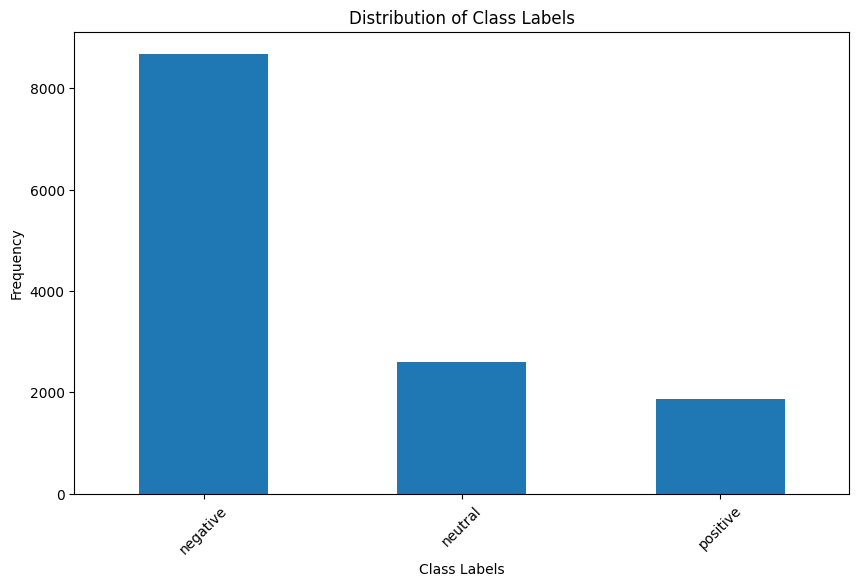

In [ ]:
#SOLUTION
#Visualise distribution of classes in the train data set


import matplotlib.pyplot as plt

# Plot the distribution of the labels
plt.figure(figsize=(10, 6))

#train_set['label'].value_counts().plot(kind='bar')
label_counts = train_set['label_description'].value_counts()
label_counts.plot.bar(figsize=(10, 6), title='Distribution of Class Labels')

plt.title('Distribution of Class Labels')
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.show()



## Test SET

Apply the same aforementioned steps on the test set:

1. **Load the CSV data**
   - Use `pandas` to read the CSV file
   - Check the first few rows of the data
2. **Map numeric labels to descriptive labels**
   - Create a dictionary for mapping
   - Use the `map()` function
3. **Plot the distribution of the descriptive labels**
   - Calculate value counts
   - Use `matplotlib` to create a bar plot



In [ ]:
#DO IT YOURSELF: load test set in pandas data frame
"""
test_set = ???
"""

In [ ]:
#SOLUTION: load test set in pandas data frame
test_set = pandas.read_csv('./testdatatweets.csv')


In [ ]:


test_set.head()

,sentence,label
0,@SouthwestAir thanks for your excellent respon...,1
1,@JetBlue thanks. I appreciate your prompt resp...,1
2,"@JetBlue yes, with about 20 minutes to spare. ...",1
3,@USAirways YOU ARE THE BEST!!! FOLLOW ME PLEAS...,1
4,@JetBlue beautiful ride. Thanks again:),1


In [ ]:
#4 DO IT YOURSELF: map numeric to descriptive labels and check first rows
"""


"""

In [ ]:
#SOLUTION: map numeric to descriptive labels and check first rows
label_mapping = {0: 'negative', 1: 'positive', 2: 'neutral'}
test_set['label_description'] = test_set['label'].map(label_mapping)

In [ ]:
test_set.head()

,sentence,label,label_description
0,@SouthwestAir thanks for your excellent respon...,1,positive
1,@JetBlue thanks. I appreciate your prompt resp...,1,positive
2,"@JetBlue yes, with about 20 minutes to spare. ...",1,positive
3,@USAirways YOU ARE THE BEST!!! FOLLOW ME PLEAS...,1,positive
4,@JetBlue beautiful ride. Thanks again:),1,positive


In [ ]:
#DO IT YOURSELF
#Visualise distribution of classes in the test data set
#Insert code
"""






"""

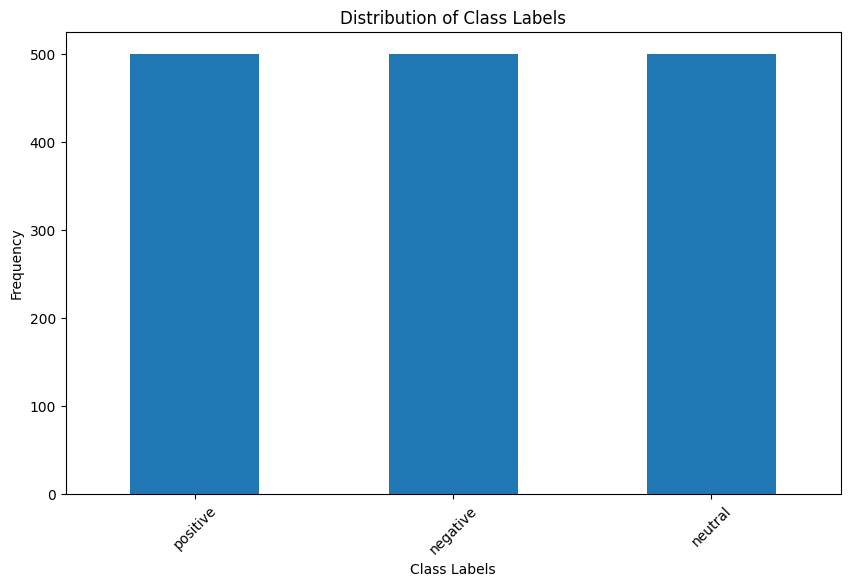

In [ ]:
#SOLUTION
#Visualise distribution of classes in the test data set

import matplotlib.pyplot as plt

# Plot the distribution of the labels
plt.figure(figsize=(10, 6))

#train_set['label'].value_counts().plot(kind='bar')
label_counts = test_set['label_description'].value_counts()
label_counts.plot.bar(figsize=(10, 6), title='Distribution of Class Labels')

plt.title('Distribution of Class Labels')
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.show()

### Balanced versus unbalanced data.

The Test set is balanced whereas the training data set is unbalanced.<br>
For now, we will continue training on the current train data set, and as a second step, we will compare with training on a balanced training data set.<br>

In [ ]:
train_set = pd.read_csv('traindatatweets.csv')
train_set.head()

,sentence,label
0,@VirginAmerica plus you've added commercials t...,1
1,@VirginAmerica I didn't today... Must mean I n...,2
2,@VirginAmerica it's really aggressive to blast...,0
3,@VirginAmerica and it's a really big bad thing...,0
4,@VirginAmerica seriously would pay $30 a fligh...,0


### Augment samples in minority classes

# Tutorial: Data Augmentation with NLTK and WordNet

In this tutorial, we will use NLTK and WordNet to perform data augmentation by replacing adjectives, nouns, and verbs with their synonyms. This technique helps to balance an unbalanced dataset by increasing the number of samples in underrepresented classes.

### Step-by-Step Explanation:

1. **Import Necessary Libraries**:
   - We import essential libraries including `pandas`, `random`, and modules from `nltk`.

    ```python
    import pandas as pd
    import random
    import nltk
    from nltk.corpus import wordnet
    from nltk.tokenize import word_tokenize
    from nltk import pos_tag
    ```

2. **Download Necessary NLTK Data**:
   - Download the WordNet corpus, the averaged perceptron tagger, and the Punkt tokenizer model.

    ```python
    nltk.download('wordnet')
    nltk.download('averaged_perceptron_tagger')
    nltk.download('punkt')
    ```

3. **Define Function to Get Synonyms**:
   - The `get_synonyms` function retrieves synonyms for a given word based on its part-of-speech (POS) tag.

    ```python
    def get_synonyms(word, pos_tag):
        synonyms = set()
        wordnet_pos = get_wordnet_pos(pos_tag)
        for syn in wordnet.synsets(word, pos=wordnet_pos):
            for lemma in syn.lemmas():
                if lemma.name().replace("_", " ") != word:
                    synonyms.add(lemma.name().replace("_", " "))
        return list(synonyms)
    ```

4. **Define Function to Map Treebank POS Tags to WordNet POS Tags**:
   - The `get_wordnet_pos` function converts POS tags from the Treebank format to the WordNet format.

    ```python
    def get_wordnet_pos(treebank_tag):
        if treebank_tag.startswith('J'):
            return wordnet.ADJ
        elif treebank_tag.startswith('V'):
            return wordnet.VERB
        elif treebank_tag.startswith('N'):
            return wordnet.NOUN
        else:
            return None
    ```

5. **Define Sentence Augmentation Function**:
   - The `augment_sentence` function tokenizes the sentence, tags each word with its POS, finds synonyms for adjectives, verbs, and nouns, and replaces the original words with their synonyms.

    ```python
    def augment_sentence(sentence):
        words = word_tokenize(sentence)
        pos_tags = pos_tag(words)
        new_sentence = words.copy()
        for i, (word, tag) in enumerate(pos_tags):
            wordnet_pos = get_wordnet_pos(tag)
            if wordnet_pos:
                synonyms = get_synonyms(word, wordnet_pos)
                print(f"Word: {word}, POS Tag: {tag}, Synonyms: {synonyms}")  # Debug print
                if synonyms:
                    new_sentence[i] = random.choice(synonyms)
        return ' '.join(new_sentence)
    ```

6. **Example Usage**:
   - Demonstrate the augmentation function on an example sentence.

    ```python
    sentence = "I had a bad experience on that airplane"
    augmented_sentence = augment_sentence(sentence)
    print(f"Original: {sentence}")
    print(f"Augmented: {augmented_sentence}")
    ```

This approach helps in augmenting the dataset by increasing its variability, thus making the model more robust and less prone to overfitting. Each time the augmentation function is called, it replaces adjectives, nouns, and verbs with their synonyms, providing different variations of the same sentence.


In [ ]:
import pandas as pd
import random
import nltk
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# Download necessary NLTK data
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

def get_synonyms(word, pos_tag):
    synonyms = set()
    wordnet_pos = get_wordnet_pos(pos_tag)
    for syn in wordnet.synsets(word, pos=wordnet_pos):
        for lemma in syn.lemmas():
            if lemma.name().replace("_", " ") != word:
                synonyms.add(lemma.name().replace("_", " "))
    return list(synonyms)

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    else:
        return None

def augment_sentence(sentence):
    words = word_tokenize(sentence)
    pos_tags = pos_tag(words)
    new_sentence = words.copy()
    for i, (word, tag) in enumerate(pos_tags):
        wordnet_pos = get_wordnet_pos(tag)
        if wordnet_pos:
            synonyms = get_synonyms(word, wordnet_pos)
            print(f"Word: {word}, POS Tag: {tag}, Synonyms: {synonyms}")  # Debug print
            if synonyms:
                new_sentence[i] = random.choice(synonyms)
    return ' '.join(new_sentence)

# Example usage
sentence = "I had a bad experience on that airplane"
augmented_sentence = augment_sentence(sentence)
print(f"Original: {sentence}")
print(f"Augmented: {augmented_sentence}")


Word: had, POS Tag: VBD, Synonyms: ['possess', 'take', 'own', 'have got', 'suffer', 'take in', 'get', 'hold', 'receive', 'experience', 'ingest', 'accept', 'sustain', 'have', 'feature', 'throw', 'induce', 'give birth', 'birth', 'bear', 'give', 'let', 'cause', 'deliver', 'consume', 'make', 'stimulate']
Word: bad, POS Tag: JJ, Synonyms: ['speculative', 'forged', 'spoilt', 'sorry', 'unfit', 'unsound', 'risky', 'regretful', 'defective', 'badly', 'tough', 'uncollectible', 'high-risk', 'spoiled', 'badness', 'big']
Word: experience, POS Tag: NN, Synonyms: ['go through', 'receive', 'know', 'live', 'get', 'feel', 'see', 'have']
Word: airplane, POS Tag: NN, Synonyms: ['aeroplane', 'plane']
Original: I had a bad experience on that airplane
Augmented: I own a regretful get on that aeroplane


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Tutorial: Data Augmentation for Balancing the Dataset

In this tutorial, we will learn how to use data augmentation to balance an unbalanced dataset by augmenting the underrepresented classes. The goal is to ensure each class has an equal number of samples, improving the model's performance and reducing bias.

## Steps to Balance the Training Dataset

### Step 1: Download Necessary NLTK Data

First, we need to download the required data from NLTK:
- WordNet: A lexical database for the English language.
- Averaged Perceptron Tagger: A part-of-speech tagger.
- Punkt: A tokenizer for splitting text into sentences.

### Step 2: Define Functions for Synonym Replacement

- **`get_synonyms(word, pos_tag)`**: This function retrieves synonyms for a given word based on its part-of-speech (POS) tag using WordNet.
- **`get_wordnet_pos(treebank_tag)`**: This function converts POS tags from the Treebank format to the WordNet format.
- **`augment_sentence(sentence)`**: This function tokenizes the sentence, tags each word with its POS, finds synonyms for adjectives, verbs, and nouns, and replaces the original words with their synonyms. It also prints the original and new sentences along with their labels if a synonym is found.

### Step 3: Load the Training Dataset

- Load the dataset into a pandas DataFrame.
- Display the first few rows of the dataset to understand its structure.

### Step 4: Identify the Majority Class

- Calculate the number of samples in each class.
- Determine the size of the majority class.

### Step 5: Augment Sentences for the Minority Classes

For each minority class:
- Determine the number of synthetic samples needed to balance the class with the majority class.
- Sample sentences from the minority class with replacement to create synthetic samples.
- Apply the `augment_sentence` function to each sampled sentence to replace adjectives, nouns, and verbs with their synonyms.
- Collect the augmented sentences and corresponding labels.

### Step 6: Combine Original and Synthetic Data

- Combine the original dataset with the augmented sentences to create a balanced dataset.
- Display the shapes of the original and balanced datasets to confirm the augmentation.

### Step 7: Save the Balanced Dataset

- Save the balanced dataset to a new CSV file.

By following these steps, we ensure that each class in our training dataset has an equal number of samples, which helps to train a more robust and unbiased machine learning model.


In [ ]:
#SOLUTION
import pandas as pd
import random
import nltk
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# Download necessary NLTK data
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

def get_synonyms(word, pos_tag):
    synonyms = set()
    wordnet_pos = get_wordnet_pos(pos_tag)
    for syn in wordnet.synsets(word, pos=wordnet_pos):
        for lemma in syn.lemmas():
            if lemma.name().replace("_", " ") != word:
                synonyms.add(lemma.name().replace("_", " "))
    return list(synonyms)

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    else:
        return None

def augment_sentence(sentence, label):
    words = word_tokenize(sentence)
    pos_tags = pos_tag(words)
    new_sentence = words.copy()
    synonym_found = False
    for i, (word, tag) in enumerate(pos_tags):
        wordnet_pos = get_wordnet_pos(tag)
        if wordnet_pos:
            synonyms = get_synonyms(word, wordnet_pos)
            if synonyms:
                new_word = random.choice(synonyms)
                new_sentence[i] = new_word
                synonym_found = True
    if synonym_found:
        print(f"Original sentence: {sentence}")
        print(f"New sentence: {' '.join(new_sentence)}")
        print(f"Label: {label}\n")
    return ' '.join(new_sentence)

# Load the dataset
train_set = pd.read_csv('traindatatweets.csv')

# Display the first few rows of the dataset to understand its structure
print(train_set.head())

# Assuming the columns are 'sentence' and 'label'
X = train_set['sentence']
y = train_set['label']

# Identify the minority class
class_counts = y.value_counts()
majority_class_size = class_counts.max()

# Augment sentences for the minority classes
augmented_sentences = []
augmented_labels = []

for label, count in class_counts.items():
    if count < majority_class_size:
        num_synthetic_samples = majority_class_size - count
        minority_sentences = train_set[train_set['label'] == label]['sentence']
        synthetic_sentences = minority_sentences.sample(num_synthetic_samples, replace=True).reset_index(drop=True).apply(lambda x: augment_sentence(x, label))
        augmented_sentences.extend(synthetic_sentences)
        augmented_labels.extend([label] * num_synthetic_samples)

# Combine original and synthetic data
synthetic_data = pd.DataFrame({'sentence': augmented_sentences, 'label': augmented_labels})
balanced_train_set = pd.concat([train_set, synthetic_data]).reset_index(drop=True)

# Display the shape of the original and balanced datasets
print("Original dataset shape:", train_set.shape)
print("Balanced dataset shape:", balanced_train_set.shape)

# Save the balanced dataset to a new CSV file
balanced_train_set.to_csv('balanced_traindatatweets.csv', index=False)

print("Balanced dataset saved as balanced_traindatatweets.csv")


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Streaming output truncated to the last 5000 lines.

Original sentence: @JetBlue safety first !! #lovejetblue
New sentence: @ JetBlue safe first ! ! # lovejetblue
Label: 1

Original sentence: @united thank you for compensating us for our 4 lost bags. We will fly with you again! #UnitedAirlines
New sentence: @ merge give thanks you for compensate us for our 4 turn a loss pocket . We will fly ball with you again ! # UnitedAirlines
Label: 1

Original sentence: @united Joni did a great job on flight 5653 to LAX. Thanks for a great flight.
New sentence: @ merge Joni cause a bully occupation on flying 5653 to loose . give thanks for a capital escape .
Label: 1

Original sentence: @JetBlue PDX to JFK was suuuuper HOT.
New sentence: @ JetBlue PDX to Jack Kennedy personify suuuuper hot .
Label: 1

Original sentence: @united This is probably the least dependable airline in the Western Hemisphere. @united does not belong in Star Alliance, but SkyTeam
New sentence: @ unite This cost probably the to

In [ ]:
#DO IT YOURSELF

"""
import pandas as pd
import random
import nltk
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# Download necessary NLTK data
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

def get_synonyms(word, pos_tag):
    synonyms = set()
    wordnet_pos = get_wordnet_pos(pos_tag)
    for syn in wordnet.synsets(word, pos=wordnet_pos):
        for lemma in syn.lemmas():
            if lemma.name().replace("_", " ") != word:
                synonyms.add(lemma.name().replace("_", " "))
    return list(synonyms)

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    else:
        return None

def augment_sentence(sentence, label):
    words = word_tokenize(sentence)
    pos_tags = pos_tag(words)
    new_sentence = words.copy()
    synonym_found = False
    for i, (word, tag) in enumerate(pos_tags):
        wordnet_pos = get_wordnet_pos(tag)
        if wordnet_pos:
            synonyms = get_synonyms(word, wordnet_pos)
            if synonyms:
                new_word = random.choice(synonyms)
                new_sentence[i] = new_word
                synonym_found = True
    if synonym_found:
        print(f"Original sentence: {sentence}")
        print(f"New sentence: {' '.join(new_sentence)}")
        print(f"Label: {label}\n")
    return ' '.join(new_sentence)

# Load the dataset
train_set = ???

# Display the first few rows of the dataset to understand its structure
print(train_set.head())

# Assuming the columns are 'sentence' and 'label'
X = ???
y = ???

# Identify the minority class
class_counts = ???
majority_class_size = class_counts.max()

# Augment sentences for the minority classes
augmented_sentences = []
augmented_labels = []

for label, count in class_counts.items():
    if count < majority_class_size:
        num_synthetic_samples = majority_class_size - count
        minority_sentences = train_set[train_set['label'] == label]['sentence']
        synthetic_sentences = minority_sentences.sample(num_synthetic_samples, replace=True).reset_index(drop=True).apply(lambda x: augment_sentence(x, label))
        augmented_sentences.extend(synthetic_sentences)
        augmented_labels.extend([label] * num_synthetic_samples)

# Combine original and synthetic data
synthetic_data = pd.DataFrame({'sentence': augmented_sentences, 'label': augmented_labels})
balanced_train_set = pd.concat([train_set, ???]).reset_index(drop=True)

# Display the shape of the original and balanced datasets
print("Original dataset shape:", ???)
print("Balanced dataset shape:", ???)

# Save the balanced dataset to a new CSV file
balanced_train_set.to_csv('balanced_traindatatweets.csv', index=False)

print("Balanced dataset saved as balanced_traindatatweets.csv")

"""


In [ ]:

bal_trainset = pd.read_csv('balanced_traindatatweets.csv')
bal_trainset.head()

,sentence,label
0,@VirginAmerica plus you've added commercials t...,1
1,@VirginAmerica I didn't today... Must mean I n...,2
2,@VirginAmerica it's really aggressive to blast...,0
3,@VirginAmerica and it's a really big bad thing...,0
4,@VirginAmerica seriously would pay $30 a fligh...,0


In [ ]:
len(bal_trainset)

26034

In [ ]:
#DO IT YOURSELF
#Visualise distribution of classes in the updated and augmented train data set

"""




















"""

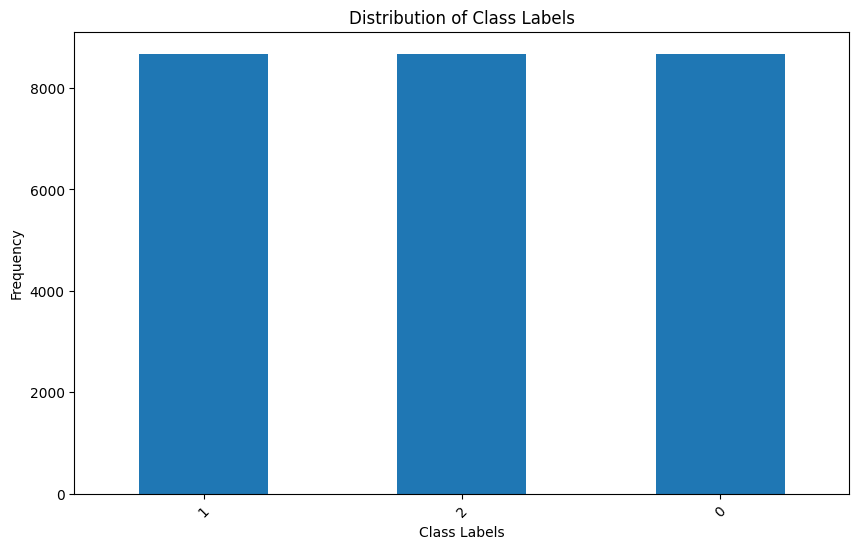

In [ ]:
#SOLUTION
#Visualise distribution of classes in the train data set

import matplotlib.pyplot as plt

# Plot the distribution of the labels
plt.figure(figsize=(10, 6))

#train_set['label'].value_counts().plot(kind='bar')
label_counts = bal_trainset['label'].value_counts()
label_counts.plot.bar(figsize=(10, 6), title='Distribution of Class Labels')

plt.title('Distribution of Class Labels')
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.show()

Let's try to build a simple logistic regression model to predict the sentiment label from the given reviews!

###NEXT STEPS WILL BE OMITTED FOR STUDENT VERSION:

Next steps are simply repeating the steps of the extend version of features.

In [ ]:
#To build a machine learning model, we are only interested in the "sentence" and "numeric label" information for now
baltrain_subset = bal_trainset[["sentence", "label"]]


In [ ]:
baltrain_subset.head()

,sentence,label
0,@VirginAmerica plus you've added commercials t...,1
1,@VirginAmerica I didn't today... Must mean I n...,2
2,@VirginAmerica it's really aggressive to blast...,0
3,@VirginAmerica and it's a really big bad thing...,0
4,@VirginAmerica seriously would pay $30 a fligh...,0


In [ ]:
# Let's extract only these two columns from the data
train_reviews = bal_trainset['sentence'].to_list()
train_labels = bal_trainset['label'].to_list()
print(train_reviews[:5])
print(train_labels[:5])



["@VirginAmerica plus you've added commercials to the experience... tacky.", "@VirginAmerica I didn't today... Must mean I need to take another trip!", '@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse', "@VirginAmerica and it's a really big bad thing about it", "@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA"]
[1, 2, 0, 0, 0]


In [ ]:
len(train_labels)

26034

In [ ]:
# What are the unique labels
print(list(set(train_labels)))

# Let's also print the count of each label in this data set
negative_count = train_labels.count(0)
positive_count = train_labels.count(1)
neutral_count = train_labels.count(2)

print(negative_count, positive_count, neutral_count)


[0, 1, 2]
8678 8678 8678


In [ ]:
import pandas
#test_set = pandas.read_csv('./test1.csv', sep='\t', encoding='utf-8')
test_set = pandas.read_csv('./testdatatweets.csv')
test_set


# Let's extract only the relevant columns, and put them in lists
test_reviews = test_set['sentence'].to_list()
test_labels = test_set['label'].to_list()

# Print the first five item in each list to make sure it looks ok
print(test_reviews[:5])
print(test_labels[:5])

# Check the length of the items in the test_set
print(len(test_reviews))

['@SouthwestAir thanks for your excellent response time and assistance! All set :)', '@JetBlue thanks. I appreciate your prompt response.', '@JetBlue yes, with about 20 minutes to spare.  FYI - your employees are amazing.  Keep up the good work!', '@USAirways YOU ARE THE BEST!!! FOLLOW ME PLEASE;)🙏🙏🙏✌️✌️✌️🙏🙏🙏', '@JetBlue beautiful ride. Thanks again:)']
[1, 1, 1, 1, 1]
1500


When processing large volumes of text, the statistical models are usually more efficient if you let them work on batches of texts. spaCy’s __nlp.pipe()__ method takes an iterable of texts and yields processed Doc objects.

## Extending the feature set ###

Until now, we used 40 features (terms) to predict the sentiment of a given review, based on its review.
We can of course use more features, which is also the power of machine learning systems.

In the following exercises, we will use all adjectives in the training set as our term (feature) list.
Instead of being limited to 40 terms, we can now work with a larger vocabulary.
The advantage of this method is that there might be other terms (features), which might be useful to make the correct predictions.

Let's start by collecting all the adjectives from the reviews in the training set.<br>



In [ ]:
#DO IT YOURSELF
"""
import spacy

nlp = spacy.load('en_core_web_sm')

# Process a text
train_doc_reviews = nlp.pipe(train_reviews)

list_adj = []

for review in train_doc_reviews:
    for token in review:
        # If the token is an adjective, we would like to add this to list_adj
        if ???
            list_adj.append(token.lower_)

# We can also count the number of unique adjectives to have an idea how large our feature vectors will be
print(len(list_adj))
print(list_adj)
"""

In [ ]:
len(train_reviews)

26034

In [ ]:
#SOLUTION
import spacy

nlp = spacy.load('en_core_web_sm')

# Process a text
train_doc_reviews = nlp.pipe(train_reviews)

list_adj = []

for review in train_doc_reviews:
    for token in review:
        # If the token is an adjective, we would like to add this to list_adj
        if token.pos_ == "ADJ":
            list_adj.append(token.lower_)

# We can also count the number of unique adjectives to have an idea how large our feature vectors will be
print(len(list_adj))
print(list_adj)


27551
['tacky', 'aggressive', 'obnoxious', 'little', 'big', 'bad', 'only', 'bad', 'prime', 'amazing', 'good', 'second', 'pretty', 'better', 'minimal', 'great', '2nd', '1st', 'fabulous', 'seductive', 'excited', 'first', 'great', 'last', 'large', 'awesome', 'first', 'more', 'other', 'available', 'hipster', 'good', 'free', 'least', 'able', 'next', 'amazing', 'cold', 'middle', 'red', 'noob', 'cool', 'middle', 'online', 'expensive', 'online', 'great', 'nice', 'only', 'best', 'best', 'first', 'next', 'excited', 'hard', 'unused', 'new', 'elevategold', 'good', 'impressive', 'excited', 'last', 'amazing', 'last', 'great', 'earlier', 'fine', 'awesome', 'lax', 'dirty', 'worried', 'great', 'new', 'great', 'best', 'human', 'inflight', 'interested', 'flightattendant', 'best', 'other', 'late', 'interesting', 'next', 'disappointing', 'elevate', 'disproportionate', 'recent', 'interesting', 'other', 'friendly', 'new', 'great', 'mobile', '1st', 'uncomfortable', 'useless', 'new', 'direct', 'unexpected', 's

While this is a good start, we actually collected ALL adjectives in the reviews, with repetition.
We actually need the unique list of adjectives, as we are going to make a feature vector per review to indicate that if an adjective exists in the review or not.

Another way of reducing the vector size is only to consider the LEMMA of each adjective (so we don't need to consider all morphological variants of the same lemma).



In [ ]:
#DO IT YOURSELF
"""
nlp = spacy.load('en_core_web_sm')

# Process a text
train_doc_reviews = nlp.pipe(train_reviews)

list_adj_lemma = []

for review in train_doc_reviews:
    for token in review:
        if token.pos_ == "ADJ":
            # In this case, we will add the lemma of the adj to our list and not the full word
            list_adj_lemma.append(???)


# We are only interested in the list of unique adj
list_adj_lemma_unique = ???

# Let's print and see how many unique adj we have
print(len(list_adj_lemma_unique))
print(list_adj_lemma_unique)
"""

In [ ]:
#10 SOLUTION

nlp = spacy.load('en_core_web_sm')

# Process a text
train_doc_reviews = nlp.pipe(train_reviews)

list_adj_lemma = []

for review in train_doc_reviews:
    for token in review:
        if token.pos_ == "ADJ":
            # In this case, we will add the lemma of the adj to our list and not the full word
            list_adj_lemma.append(token.lemma_)


# We are only interested in the list of unique adj
list_adj_lemma_unique = list(set(list_adj_lemma))

# Let's print and see how many unique adj we have
print(len(list_adj_lemma_unique))
print(list_adj_lemma_unique)

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


3222
['sample', 'artificial', 'brave', '🐳', 'ski', 'raleigh', 'modernistic', 'succinct', 'interior', 'magnanimous', 'benumb', 'undimmed', 'moldable', 'roxydigital', 'wide', 'headed', 'plat', 'terminal', "ne'er", 'reckless', 'lovingness', 'nitty', 'ua1121', '@vincenzolandino', 'ramble', 'unusual', '@AmericanAir', '😜', '5th', 'forward', 'crummy', 'ravingly', 'iiiii', 'precise', 'physical', 'usable', 'royal', 'equal', 'absurd', '@tmobile', 'pricey', 'unhappy', 'opulent', 'atomic', 'chaparral', 'potable', 'lengthy', 'suree', 'untimely', 'insufficient', 'elite', 'ipodtouch', 'awry', 'annual', 'expedite', 'tonite', 'excrete', 'casual', 'notable', 'cognizant', 'quran', 'rescheduled', 'automatic', '11th', 'sunup', 'bestairline', 'tsaprecheck', 'inadequate', 'previous', 'practiced', 'frustrating', 'temporary', 'international', 'bilious', 'prime', '@jetblue', 'favorite', 'rival', 'inpolite', 'lofty', 'random', 'min', 'banal', 'icing', 'right', 'fyi', 'eastern', 'haitian', 'atl', 'chilly', 'straw

This looks much better as we have now a much smaller vector size!
Now let's create zero-vectors for our features, which we will modify per review.<br>

We do this for the train and test files.

In [ ]:
#11 DO IT YOURSELF
"""
import numpy

# columns, rows
train_features_adj = numpy.zeros(???)
print(train_features_adj.shape)


# Repeat for the test set
test_features_adj = numpy.zeros(???)
print(test_features_adj.shape)


"""

In [ ]:
#SOLUTION
import numpy

# columns, rows
train_features_adj = numpy.zeros((len(train_reviews), len(list_adj_lemma_unique)))
print(train_features_adj.shape)


# Repeat for the test set
test_features_adj = numpy.zeros((len(test_reviews), len(list_adj_lemma_unique)))
print(test_features_adj.shape)



(26034, 3222)
(1500, 3222)


Before modifying the feature vectors, let's check if everything looks ok one last time.


In [ ]:
import sys
nlp = spacy.load('en_core_web_sm')

# Process a text
train_doc_reviews = nlp.pipe(train_reviews)

for review, vector in zip(train_doc_reviews, train_features_adj):
    tokens_list = [token.lemma_ for token in review]
    # For each adj in our noun list
    for adj in list_adj_lemma_unique:
        # check if the adj exsist in this review
        if adj in tokens_list:
            # if yes, print the noun, the noun id (taken from the feature vector) and the review itself
            print(adj)
            adj_id = list_adj_lemma_unique.index(adj)
            print(adj_id)
            print(review)
            sys.exit()


tacky
1063
@VirginAmerica plus you've added commercials to the experience... tacky.


SystemExit: 

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


This seems ok.
Let's see now if we can modify the feature-vectors correctly.

In [ ]:
#12 DO IT YOURSELF
"""
nlp = spacy.load('en_core_web_sm')

# Process a text
train_doc_reviews = nlp.pipe(train_reviews)

for review, vector in zip(train_doc_reviews, train_features_adj):
    tokens_list = [token.lemma_ for token in review]
    for adj in ???:
        if adj in ???:
            print(adj)
            adj_id = list_adj_lemma_unique.index(adj)
            print(adj_id)
            vector[adj_id] = 1
        if 1 in vector:
            print(vector.tolist())
            sys.exit()

"""

In [ ]:
#12 SOLUTION

nlp = spacy.load('en_core_web_sm')

# Process a text
train_doc_reviews = nlp.pipe(train_reviews)

for review, vector in zip(train_doc_reviews, train_features_adj):
    tokens_list = [token.lemma_ for token in review]
    for adj in list_adj_lemma_unique:
        if adj in tokens_list:
            print(adj)
            adj_id = list_adj_lemma_unique.index(adj)
            print(adj_id)
            vector[adj_id] = 1
        if 1 in vector:
            print(vector.tolist())
            sys.exit()

tacky
1063
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

SystemExit: 

In [ ]:
train_features_adj.shape

(26034, 3222)

Now let's run the whole process on the training and test sets and generate our feature vectors.


In [ ]:
#13 DO IT YOURSELF
#apply process to the train set
"""
nlp = spacy.load('en_core_web_sm')

# Process a text
train_doc_reviews = nlp.pipe(train_reviews)

for review, vector in zip(train_doc_reviews, train_features_adj):
???






"""

In [ ]:
#13 SOLUTION
#apply process to the train set
nlp = spacy.load('en_core_web_sm')

# Process a text
train_doc_reviews = nlp.pipe(train_reviews)
testi=[]
for review, vector in zip(train_doc_reviews, train_features_adj):
    tokens_list = [token.lemma_ for token in review]
    for adj in list_adj_lemma_unique:
        if adj in tokens_list:
            adj_id = list_adj_lemma_unique.index(adj)
            vector[adj_id] = 1



### DIY
convert this process to a function so that we can use it for generating the feature-vectors for the test set (or for any input data set consisting of reviews and features)?

In [ ]:
#14 DO IT YOURSELF
"""
def generate_feature_vectors(reviews, features):
    # Add your code here







"""

In [ ]:
#14 SOLUTION
def generate_feature_vectors(reviews, features):
    for review, vector in zip(reviews, features):
        tokens_list = [token.lemma_ for token in review]
        for adj in list_adj_lemma_unique:
            if adj in tokens_list:
                adj_id = list_adj_lemma_unique.index(adj)
                vector[adj_id] = 1





Now we can extract feature values for the test set using this function.

In [ ]:
nlp = spacy.load('en_core_web_sm')

# Process test file with spacy
test_doc_reviews = nlp.pipe(test_reviews)

# Update feature vectors for the test set
generate_feature_vectors(test_doc_reviews, test_features_adj)

Let's check if the features are generated correctly.
The first adjective in the first review is "excellent".
We can get the index of excellent in list_adj_lemma_unique and use this index to check the value of it in the feature-vector for this review.

In [ ]:
print(test_reviews[0])

@SouthwestAir thanks for your excellent response time and assistance! All set :)


In [ ]:
print(test_reviews[0])
great_id = list_adj_lemma_unique.index("excellent")

print(great_id)
print(test_features_adj[0][great_id])

@SouthwestAir thanks for your excellent response time and assistance! All set :)
1047
1.0


Everything seems ok.
Let's train our model now.

In [ ]:
#15 DO IT YOURSELF
"""
#In sklearn, all machine learning models are implemented as Python classes
from sklearn.linear_model import LogisticRegression

# Make an instance of the Model
# all parameters not specified are set to their defaults
lr_adj = ???

# Train the model on the data, storing the information learned from the data
# Model is learning the relationship between digits (x_train) and labels (y_train)
lr_adj.fit(???)

# Let's see what are the possible labels to predict (and in which order they are stored)
print(lr_adj.classes_)

# We can get additional information about all the parameters used with LogReg model
print(lr_adj.get_params())

"""

In [ ]:
#15 SOLUTION

#In sklearn, all machine learning models are implemented as Python classes
from sklearn.linear_model import LogisticRegression

# Make an instance of the Model
# all parameters not specified are set to their defaults
lr_adj2 = LogisticRegression(max_iter=300)

# Train the model on the data, storing the information learned from the data
# Model is learning the relationship between digits (x_train) and labels (y_train)
lr_adj2.fit(train_features_adj, train_labels)

# Let's see what are the possible labels to predict (and in which order they are stored)
print(lr_adj2.classes_)

# We can get additional information about all the parameters used with LogReg model
print(lr_adj2.get_params())


[0 1 2]
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 300, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [ ]:
train_features_adj.shape

(26034, 3222)

In [ ]:
def predict_adj(index):
    print(test_reviews[index])
    print(test_features_adj[index])
    print(test_labels[index])

    print()
    print("Predictions:")
    # Print prediction
    print(lr_adj2.predict([test_features_adj[index]]))
    # print prob of all label predictions
    print(lr_adj2.predict_proba([test_features_adj[index]]))
    # print all labels
    print(lr_adj2.classes_)
    print()

In [ ]:
#predict_adj(0)
predict_adj(1000)

@united we finally just arrive to Bogota, good but long flight!!
[0. 0. 0. ... 0. 0. 0.]
2

Predictions:
[0]
[[0.80448341 0.10499112 0.09052547]]
[0 1 2]



Let's save our model.

In [ ]:
#16 DO IT YOURSELF
#save model as logreg_adj.pkl
"""
import pickle

# Save to file in the current working directory
pkl_filename = "logreg_adj2.pkl"
???


"""

In [ ]:
#16 SOLUTION
#save model as logreg_adj.pkl
import pickle

# Save to file in the current working directory
pkl_filename = "logreg_adj2.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(lr_adj2, file)

#Evaluation

Evaluate using model lr_adj or with pickle file logreg_adj.pkl if you could not train the model<br>

In [ ]:
#len(test_labels)
#len(test_features_adj)
test_features_adj.shape

(1500, 3222)

In [ ]:
#17 DO IT YOURSELF

#with lr_adj model
"""
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report


def evaluate_model(features, true_labels, model):
    # Predict the labels for the dataset
    predictions = model.predict(???)

    # Calculate the accuracy
    accuracy = accuracy_score(??? , ???)
    print("Accuracy:", accuracy)

    # Calculate the recall
    recall = recall_score(???, ???, average='macro')  # Use 'macro' for unbalanced classes
    print("Recall:", recall)

    # Calculate the precision
    precision = precision_score(???, ???, average='macro')  # Use 'macro' for unbalanced classes
    print("Precision:", precision)

    # Calculate the F1 score
    f1 = f1_score(???, ???, average='macro')  # Use 'macro' for unbalanced classes
    print("F1 Score:", f1)
    print(classification_report(???, ???))

# Assuming `lr_adj2` is your logistic regression model
#with lr_adj2
evaluate_model(???)

"""

In [ ]:
#17 SOLUTION

#with lr_adj model
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report


def evaluate_model(features, true_labels, model):
    # Predict the labels for the dataset
    predictions = model.predict(features)

    # Calculate the accuracy
    accuracy = accuracy_score(true_labels, predictions)
    print("Accuracy:", accuracy)

    # Calculate the recall
    recall = recall_score(true_labels, predictions, average='macro')  # Use 'macro' for unbalanced classes
    print("Recall:", recall)

    # Calculate the precision
    precision = precision_score(true_labels, predictions, average='macro')  # Use 'macro' for unbalanced classes
    print("Precision:", precision)

    # Calculate the F1 score
    f1 = f1_score(true_labels, predictions, average='macro')  # Use 'macro' for unbalanced classes
    print("F1 Score:", f1)
    print(classification_report(true_labels, predictions))

# Assuming `lr_adj` is your logistic regression model
#with lr_adj
evaluate_model(test_features_adj, test_labels, lr_adj2)



Accuracy: 0.5506666666666666
Recall: 0.5506666666666667
Precision: 0.632167786388716
F1 Score: 0.5209320210538495
              precision    recall  f1-score   support

           0       0.45      0.91      0.60       500
           1       0.84      0.54      0.66       500
           2       0.61      0.20      0.30       500

    accuracy                           0.55      1500
   macro avg       0.63      0.55      0.52      1500
weighted avg       0.63      0.55      0.52      1500



In [ ]:
#18 DO IT YOURSELF

"""
#with file logreg_adj.pkl
import pickle
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report

def evaluate_model(features, true_labels, model_file):
    # Load the model from a pickle file
    with open(model_file, 'rb') as file:
        model = pickle.load(file)

    # Predict the labels for the dataset
    predictions = model.predict(???)

    # Calculate the accuracy
    accuracy = accuracy_score(???, ???)
    print("Accuracy:", accuracy)

    # Calculate the recall
    recall = recall_score(???, ???, average='macro')  # Use 'macro' for unbalanced classes
    print("Recall:", recall)

    # Calculate the precision
    precision = precision_score(???, ???, average='macro')  # Use 'macro' for unbalanced classes
    print("Precision:", precision)

    # Calculate the F1 score
    f1 = f1_score(???, ???, average='macro')  # Use 'macro' for unbalanced classes
    print("F1 Score:", f1)

    # Print classification report
    print(classification_report(???, ???))

# Specify the pickle filename that contains the saved model
pkl_filename = ???

# Assuming `test_features_adj` and `test_labels` are your test dataset
evaluate_model(???)
"""

In [ ]:
#18 SOLUTION

#with file logreg_adj.pkl
import pickle
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report

def evaluate_model(features, true_labels, model_file):
    # Load the model from a pickle file
    with open(model_file, 'rb') as file:
        model = pickle.load(file)

    # Predict the labels for the dataset
    predictions = model.predict(features)

    # Calculate the accuracy
    accuracy = accuracy_score(true_labels, predictions)
    print("Accuracy:", accuracy)

    # Calculate the recall
    recall = recall_score(true_labels, predictions, average='macro')  # Use 'macro' for unbalanced classes
    print("Recall:", recall)

    # Calculate the precision
    precision = precision_score(true_labels, predictions, average='macro')  # Use 'macro' for unbalanced classes
    print("Precision:", precision)

    # Calculate the F1 score
    f1 = f1_score(true_labels, predictions, average='macro')  # Use 'macro' for unbalanced classes
    print("F1 Score:", f1)

    # Print classification report
    print(classification_report(true_labels, predictions))

# Specify the pickle filename that contains the saved model
pkl_filename = "logreg_adj2.pkl"

# Assuming `test_features_adj` and `test_labels` are your test dataset
evaluate_model(test_features_adj, test_labels, pkl_filename)


Accuracy: 0.5506666666666666
Recall: 0.5506666666666667
Precision: 0.632167786388716
F1 Score: 0.5209320210538495
              precision    recall  f1-score   support

           0       0.45      0.91      0.60       500
           1       0.84      0.54      0.66       500
           2       0.61      0.20      0.30       500

    accuracy                           0.55      1500
   macro avg       0.63      0.55      0.52      1500
weighted avg       0.63      0.55      0.52      1500



Analyse theses results taking into account the class distributions of the train set.